# Figures and Results in the Supplementary Information

In [1]:
import import_ipynb
from common import *
warnings.filterwarnings('ignore')

importing Jupyter notebook from common.ipynb


### Generous Zero-Determinant Strategies

In [2]:
eqs = (-1 + p_1 - phi*((R - O) - chi*(R - O)),
       -1 + p_2 + phi*((O - S) + chi*(T - O)), 
       p_3 - phi*((T - O) + chi*(O - S)), 
       p_4 + phi*((O - P) - chi*(O - P)))
s_gen = solve(eqs, p_1, p_2, p_3, p_4) 
s_X_gen = s_X.subs([(p_1, s_gen[p_1]), (p_2, s_gen[p_2]), (p_3, s_gen[p_3]), (p_4, s_gen[p_4])])
s_Y_gen = s_Y.subs([(p_1, s_gen[p_1]), (p_2, s_gen[p_2]), (p_3, s_gen[p_3]), (p_4, s_gen[p_4])])
factor((s_X_gen - O)/(s_Y_gen - O))

### X Unilaterally Sets Y’s Score (we add this part only for the completeness of our analysis).

In [3]:
# eqs = (-1 + p_1 - (beta*R + gamma), -1 + p_2 - (beta*T + gamma), 
      # p_3 - (beta*S + gamma), p_4 - (beta*P + gamma))
# s = solve(eqs, p_2, p_3, beta, gamma)
# s_X = s_X.subs([(p_2, s[p_2]), (p_3, s[p_3])])
# s_Y = s_Y.subs([(p_2, s[p_2]), (p_3, s[p_3])])

### X Demands and Gets an Extortionate Share (where we have the linear relation $s_X - P = \chi(s_Y - P)$).

In [4]:
eqs = (-1 + p_1 - phi*((R - P) - chi*(R - P)), # the euqations we need to solve
       -1 + p_2 + phi*((P - S) + chi*(T - P)), 
       p_3 - phi*((T - P) + chi*(P - S)), 
       p_4 - phi*((P - P) - chi*(P - P)))
s = solve(eqs, p_1, p_2, p_3, p_4) # p_1, p_2, p_3 and p_4 are functions of phi and chi

In [5]:
# Substitute p_1, p_2, p_3 and p_4 into the payoff
s_X = s_X.subs([(p_1, s[p_1]), (p_2, s[p_2]), (p_3, s[p_3]), (p_4, s[p_4])])
s_Y = s_Y.subs([(p_1, s[p_1]), (p_2, s[p_2]), (p_3, s[p_3]), (p_4, s[p_4])])
factor(1 - s[p_1]), factor(1 - s[p_2]), factor(s[p_3]), s[p_4]

In [6]:
# When q_4 = 0
factor(s_X.subs(q_4, 0)), factor(s_Y.subs(q_4, 0))

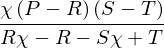

In [7]:
# When the opponent is ALLC, what will the payoff be?
factor(simplify(s_X.subs(Cooperator_q) - P))

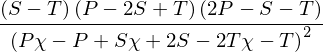

In [8]:
# When the opponent is Win-Stay Lose-Shift, how the payoff will change with respect to chi?
factor(diff(collect(simplify(s_X.subs(WinStayLoseShift_q)), chi), chi))

In [9]:
# When the opponent is (q, q, q, q), how the payoff will change with respect to chi?
num_temp, deno_temp = fraction(factor(diff(s_X.subs([(q_1, q), (q_2, q), (q_3, q), (q_4, q)]), chi)))
factor(num_temp), collect(factor_list(deno_temp)[1][0][0], chi)

### How ZD's Payoff Will Change Against Different Opponents as $\chi$ Varies?

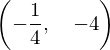

In [13]:
((S - P)/(T - P)).subs(payoff_con_subs), ((T - P)/(S - P)).subs(payoff_con_subs)

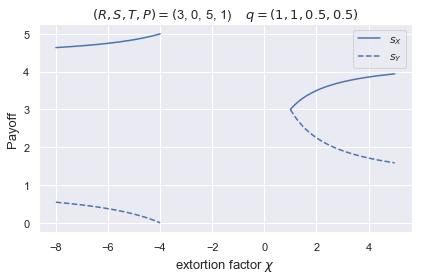

In [14]:
# Class X
q_subs_temp = [(q_1, 1), (q_2, 1), (q_3, 0.5), (q_4, 0.5)]
s_X_1D(s_X, s_Y, payoff_con_subs, [q_subs_temp], [r'$q = (1, 1, 0.5, 0.5)$'], 
       np.linspace(1, 5, 101), np.linspace(-8, -4, 101), 15, 'con_X', 0, 'XY')

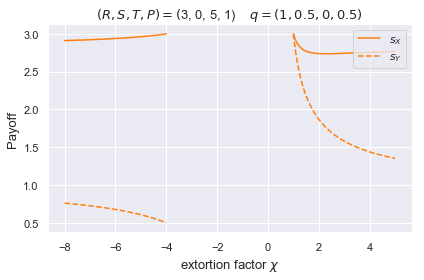

In [16]:
# Class A
q_subs_temp = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.5)]
s_X_1D(s_X, s_Y, payoff_con_subs, [q_subs_temp], [r'$q = (1, 0.5, 0, 0.5)$'], 
       np.linspace(1, 5, 101), np.linspace(-8, -4, 101), 15, 'con_A', 1, 'XY')

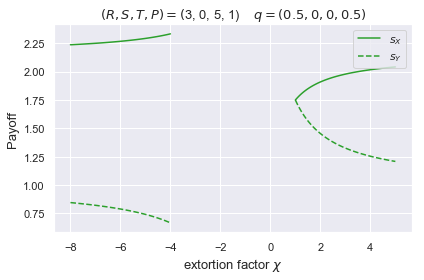

In [17]:
# Class B
q_subs_temp = [(q_1, 0.5), (q_2, 0), (q_3, 0), (q_4, 0.5)]
s_X_1D(s_X, s_Y, payoff_con_subs, [q_subs_temp], [r'$q = (0.5, 0, 0, 0.5)$'], 
       np.linspace(1, 5, 101), np.linspace(-8, -4, 101), 15, 'con_B', 2, 'XY')

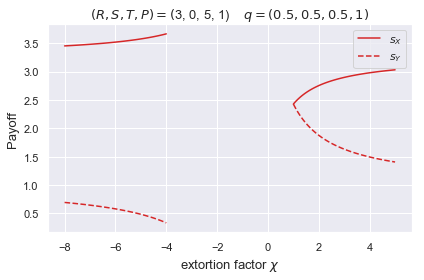

In [18]:
# Class C
q_subs_temp = [(q_1, 0.5), (q_2, 0.5), (q_3, 0.5), (q_4, 1)]
s_X_1D(s_X, s_Y, payoff_con_subs, [q_subs_temp], [r'$q = (0.5, 0.5, 0.5, 1)$'],
       np.linspace(1, 5, 101), np.linspace(-8, -4, 101), 15, 'con_C', 3, 'XY')

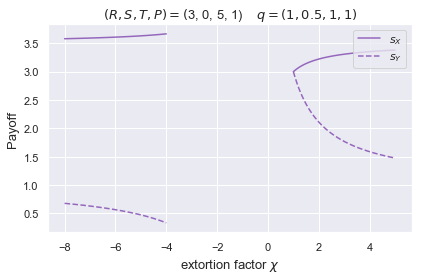

In [20]:
# Class D
q_subs_temp = [(q_1, 1), (q_2, 0.5), (q_3, 1), (q_4, 1)]
s_X_1D(s_X, s_Y, payoff_con_subs, [q_subs_temp], [r'$q = (1, 0.5, 1, 1)$'], # 1, 9/16, 1/2, 1/8
       np.linspace(1, 5, 101), np.linspace(-8, -4, 101), 15, 'con_D', 4, 'XY')

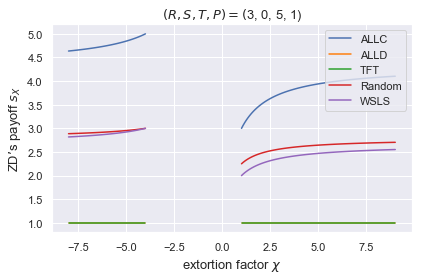

In [21]:
# Common strategies
s_X_1D(s_X, s_Y, payoff_con_subs, [Cooperator_q, Defector_q, TitForTat_q, Random_q, WinStayLoseShift_q], 
       ['ALLC', 'ALLD', 'TFT', 'Random', 'WSLS'], 
       np.linspace(1, 9, 101), np.linspace(-8, -4, 101), 15, 'con_common_strategies')

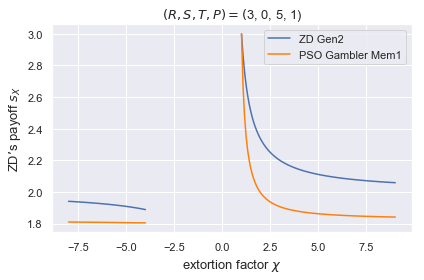

In [22]:
# Unbending strategies
s_X_1D(s_X, s_Y, payoff_con_subs, [ZDGEN2_q, PSOGamblerMem1_q], 
       ['ZD Gen2', 'PSO Gambler Mem1'], 
       np.linspace(1, 9, 101), np.linspace(-8, -4, 101), 15, 'con_uncommon_strategies')

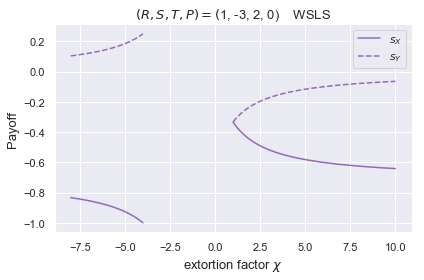

In [23]:
# Win-Stay Lose-Shift
s_X_1D(s_X, s_Y, payoff_abn_subs, [WinStayLoseShift_q], ['WSLS'], 
       np.linspace(1, 10, 101), np.linspace(-8, -4, 101), 15, 'abn_wsls', 4, 'XY')

## The Monotonicity with Respect to $\phi$.

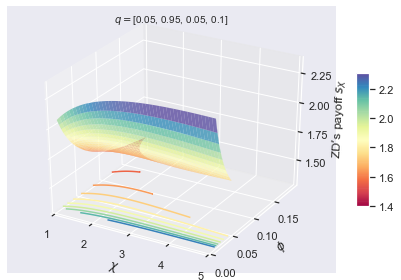

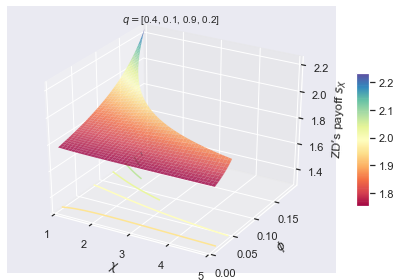

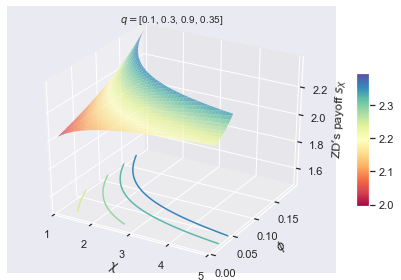

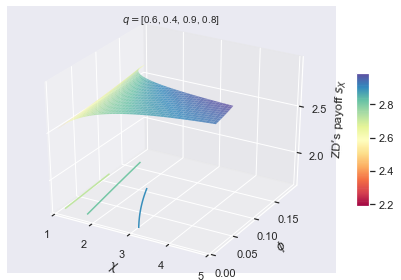

In [10]:
q_subs_1 = [(q_1, 0.05), (q_2, 0.95), (q_3, 0.05), (q_4, 0.1)]
q_subs_2 = [(q_1, 0.4), (q_2, 0.1), (q_3, 0.9), (q_4, 0.2)]
q_subs_3 = [(q_1, 0.1), (q_2, 0.3), (q_3, 0.9), (q_4, 0.35)]
q_subs_4 = [(q_1, 0.6), (q_2, 0.4), (q_3, 0.9), (q_4, 0.8)]
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_1, 'Spectral', 1)
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_2, 'Spectral', 2)
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_3, 'Spectral', 3)
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_4, 'Spectral', 4)

In [15]:
# Class A
#payoff_quad_embed(cancel(s_X.subs([(q_1, 1), (q_3, 0)])), cancel(s_Y.subs([(q_1, 1), (q_3, 0)])), 
                  #payoff_abn_subs, [(q_1, 1), (q_2, 0.1), (q_3, 0), (q_4, 0.8)], 
                  #'A_abn_1', chi_1 = 1.71428571428571, zoom = 1, ms = 5, fs = 10)
# Class B
#payoff_quad_embed(cancel(s_X.subs([(q_2, 0), (q_3, 0)])), cancel(s_Y.subs([(q_2, 0), (q_3, 0)])),
                  #payoff_abn_subs, [(q_1, 0.4), (q_2, 0), (q_3, 0), (q_4, 0.4)], 'B_abn_2')
# Class C
#payoff_quad_embed(cancel(s_X.subs([(q_2, q_1), (q_3, q_1)])), cancel(s_Y.subs([(q_2, q_1), (q_3, q_1)])), 
                  #payoff_abn_subs, [(q_1, 0.2), (q_2, 0.2), (q_3, 0.2), (q_4, 0.4)], 'C_abn_1')

## How Can $s_X$ Be Free of $\phi$?

In [16]:
# T + S >= 2P
num, deno = fraction(factor(s_X.subs(phi, phi_upper_con) - s_X.subs(phi, phi_upper_con/2)))
target_zero = factor(num/(chi*q_4*(T - S)*(T*chi - P*chi + P - S)*(P*chi - S*chi + T - P)))
# target_zero = a chi-free term * a linear function of chi
factor_1 = factor_list(target_zero)[1][0][0] # the linear function of chi
factor_0 = factor_list(target_zero)[1][1][0]*factor_list(target_zero)[0] # the chi-free term
factor_0 # Class D

In [17]:
factor_1 = collect(factor_1, chi)
f_11, f_10 = factor_1.coeff(chi, 1), factor_1.coeff(chi, 0)

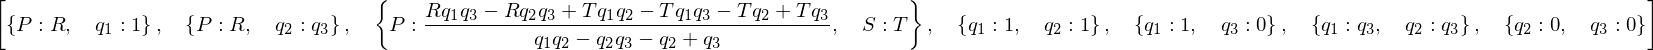

In [18]:
solve([f_11, f_10]) # Class A, B, and C

In [19]:
# T + S < 2P
num, deno = fraction(factor(s_X.subs(phi, phi_upper_abn) - s_X.subs(phi, phi_upper_abn/2)))
target_zero = factor(num/(chi*q_4*(T - S)*(P*chi - S*chi + T - P)**2))
factor_1x = factor_list(target_zero)[1][0][0]
factor_0x = factor_list(target_zero)[1][1][0]*factor_list(target_zero)[0]
factor_0x # the same as factor_0

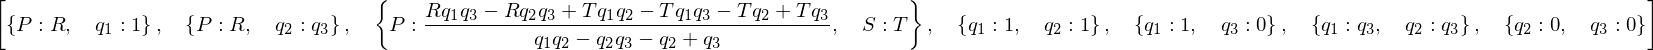

In [20]:
factor_1x = collect(factor_1, chi)
f_11x, f_10x = factor_1x.coeff(chi, 1), factor_1x.coeff(chi, 0)
solve([f_11x, f_10x])

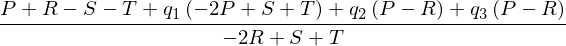

In [21]:
collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1) # h_D

## Four Different Classes

### Class X: 
### $q_1 = q_2 = 1$

We have $s_X = \frac{(T - S)(R - P)\chi}{(R - S)\chi + (T - R)} + P$, which is an increasing function of $\chi$ with derivative $s'_X = \frac{(T - R)(T - S)(R - P)}{[(R - S)\chi + (T - R)]^2}$.

Hence, Class X does not meet our requirement.

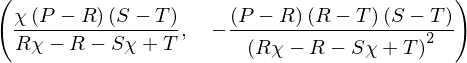

In [22]:
# q_1 = q_2 = 1
s_XX = collect(cancel(s_X.subs([(q_1, 1), (q_2, 1)])), chi)
factor(s_XX - P), factor(diff(s_XX, chi))

### Class A: 
### $q_1 = 1$ and $q_3 = 0$

In [23]:
s_XA = cancel(s_X.subs([(q_1, 1), (q_3, 0)])); s_XA = collect(s_XA, chi)
s_YA = cancel(s_Y.subs([(q_1, 1), (q_3, 0)])); s_YA = collect(s_YA, chi)
# the numerator of s_XA - P: fraction(factor(s_XA - P))[0] = (T - S) * (R - P) * q_4 * chi * a linear function of chi
temp = collect(factor_list(fraction(factor(s_XA - P))[0])[1][4][0], chi)
a_A1, a_A0 = collect(temp.coeff(chi, 1), q_2), collect(temp.coeff(chi, 0), q_2)
a_A1, a_A0 # the numerator of s_XA - P is (T - S) * (R - P) * q_4 * chi * (a_A1 * chi + a_A0)

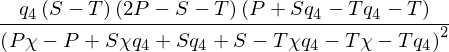

In [24]:
factor(diff(cancel(s_YA.subs(q_2, 0)), chi))

In [25]:
num_o, deno_o = fraction(factor(s_XA - P))
num_o, deno_o = - num_o, collect(-deno_o, chi)
# the denominator of s_XA - P is d_A2 * chi ** 2 + d_A1 * chi + d_A0 
d_A2 = collect(deno_o.coeff(chi, 2), q_4) # collect(factor(d_A2.coeff(q_4, 1)), q_2), factor(d_A2.coeff(q_4, 0))
d_A1 = collect(deno_o.coeff(chi, 1), q_4) # collect(factor(d_A1.coeff(q_4, 1)), q_2), factor(d_A1.coeff(q_4, 0))
d_A0 = collect(deno_o.coeff(chi, 0), q_4) # collect(factor(d_A0.coeff(q_4, 1)), q_2), factor(d_A0.coeff(q_4, 0))
target_o = collect(cancel(num_o/(chi*q_4*(T - S)*(R - P))), chi)
################################################################
factor(d_A2 + d_A1 + d_A0), collect(cancel(factor(2*d_A2 + d_A1)/(T - S)), q_4)
# d_A2 + d_A1 + d_A0 > 0, -d_A1/2d_A2 < 1
cancel((factor(2*d_A2 + d_A1)/(T - S)).subs(q_4, 0)), cancel((factor(2*d_A2 + d_A1)/(T - S)).subs(q_4, 1))
# -d_A1/2d_A2 > chi_upper
temp = factor(-d_A1/(2*d_A2) + (T - P)/(P - S)) # positive
factor(temp.subs(q_4, 0)), factor(temp.subs(q_4, 1).subs(q_2, 0))
factor(temp.subs(q_4, 1).subs(q_2, 1).subs(P, (T + S)/2))
temp = factor(-d_A1/(2*d_A2) + (P - S)/(T - P)) # positive
factor(temp.subs(q_4, 0)), factor(temp.subs(q_4, 1).subs(q_2, 0))
factor(temp.subs(q_4, 1).subs(q_2, 1))
# g(chi_upper) > 0
factor(deno_o.subs(chi, -(T - P)/(P - S))), factor(deno_o.subs(chi, -(P - S)/(T - P)))
# the numerator of s_X
collect(cancel(num_o/((T - S)*(R - P)*q_4*chi)), chi)

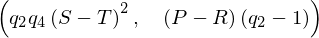

In [26]:
factor(d_A2 + d_A1 + d_A0), factor(cancel((2*d_A2 + d_A1)/(T - S)).coeff(q_4, 0))

In [27]:
# if q_2 = 0
factor(s_XA.subs(q_2, 0) - P), factor(diff(s_XA.subs(q_2, 0), chi))
# if 2P = T + S
collect(-fraction(factor(s_XA.subs(P, (T + S)/2) - (T + S)/2))[1].coeff(chi, 1), q_4)
collect(-fraction(factor(s_XA.subs(P, (T + S)/2) - (T + S)/2))[1].coeff(chi, 0), q_4) 
# fraction(factor(diff(s_XA.subs(P, (T + S)/2), chi)))[0]

In [28]:
num, deno = fraction(factor(diff(s_XA, chi)))
target_A  = cancel(num/(q_4*(T - S)*(R - P))); target_A = collect(target_A, chi)
e_2 = collect(target_A.coeff(chi, 2), q_4)
e_1 = collect(target_A.coeff(chi, 1), q_4)
e_0 = collect(target_A.coeff(chi, 0), q_4)
e_21, e_20 = collect(e_2.coeff(q_4, 1), q_2), factor(e_2.coeff(q_4, 0))
e_11, e_10 = factor(e_1.coeff(q_4, 1)), factor(e_1.coeff(q_4, 0))
e_01, e_00 = factor(e_0.coeff(q_4, 1)), factor(e_0.coeff(q_4, 0))
w_2, w_1, w_0 = factor(e_21.coeff(q_2, 2)), factor(e_21.coeff(q_2, 1)), factor(e_21.coeff(q_2, 0))
u = collect(cancel(e_20/((R - P)*(1 - q_2))), q_2).coeff(q_2, 1)
v = collect(cancel(e_20/((R - P)*(1 - q_2))), q_2).coeff(q_2, 0)

In [29]:
h_A = -e_20/e_21
q_a = -v/u
Gamma = collect(factor((e_2 + e_1 + e_0)/((T - S)**2*q_2)), q_4)
gamma = collect(factor(e_1/(2*((P - S)*q_2 + (T + S - 2*P)))), q_4)

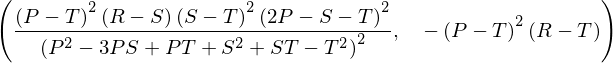

In [30]:
factor(e_21.subs(q_2, q_a)), factor(e_21.subs(q_2, 1))

### Conventional Game

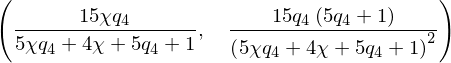

In [31]:
factor((s_XA - P).subs(payoff_con_subs))
factor(d_A0.subs(payoff_con_subs)) # factor(d_A1.subs(payoff_con_subs)), factor(d_A0.subs(payoff_con_subs))
temp = collect(cancel(fraction(factor(diff(s_XA.subs(payoff_con_subs), chi)))[0]/(10*q_4)), chi) # factor(diff(s_XA.subs(payoff_con_subs), chi))
collect(temp.coeff(chi, 2), q_4), factor(temp.coeff(chi, 1)), factor(temp.coeff(chi, 0))
# if q_2 = 0
factor((s_XA - P).subs(payoff_con_subs).subs(q_2, 0)), factor(diff(s_XA.subs(payoff_con_subs).subs(q_2, 0), chi))

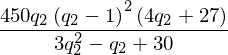

In [32]:
factor(target_A.subs(q_4, h_A).subs(chi, - (T - P)/(P - S)).subs(payoff_con_subs))

### Donation Game

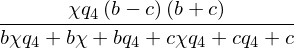

In [33]:
payoff_dg_subs = [(R, b - c), (S, -c), (T, b), (P, 0)]
factor(s_XA.subs(payoff_dg_subs))
collect(factor(d_A2.subs(payoff_dg_subs)), q_4) # factor(d_A1.subs(payoff_dg_subs) - 2*b*c*q_2*q_4) collect(factor(d_A0.subs(payoff_dg_subs)), q_4)
factor(u.subs(payoff_dg_subs)) # factor(w_1.subs(payoff_dg_subs)) factor(w_0.subs(payoff_dg_subs))
factor(s_XA.subs(payoff_dg_subs).subs(q_2, 0))

In [34]:
factor((e_1*e_21).subs(q_4, h_A).subs(payoff_dg_subs))
factor(((e_1 + e_0)*e_21).subs(q_4, h_A).subs(payoff_dg_subs))
factor(((e_2 + e_1 + e_0)*e_21).subs(q_4, h_A).subs(payoff_dg_subs)/(q_2*(b + c)**2))
factor(((2*e_2 + e_1)*e_21).subs(q_4, h_A).subs(payoff_dg_subs)/(2*b*(b + c)*q_2))

### $2P = T + S$

In [35]:
_, temp = fraction(collect(factor(s_XA.subs(P, (T + S)/2) - (T + S)/2), chi))
temp = -temp
collect(temp.coeff(chi, 0), q_4), collect(factor(temp.coeff(chi, 0).subs(q_4, 1)), q_2)

In [36]:
factor(diff(s_XA.subs(P, (T + S)/2), chi)*(temp.coeff(chi, 1)*chi + temp.coeff(chi, 0))**2/temp.coeff(chi, 0))

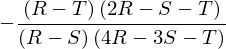

In [37]:
factor(solve(temp.coeff(chi, 0).subs(q_4, 1), q_2)[0] - (2*R - T - S)/(R - S))

In [38]:
factor(e_2.subs(P, (T + S)/2)*8/((T - S)**2*q_2) - temp.coeff(chi, 0))
factor((e_2 + e_1 + e_0).subs(P, (T + S)/2)*2/((T - S)**2*q_2) - temp.coeff(chi, 0))

### $2P > T + S$

In [39]:
gamma = collect(factor((2*e_2 + e_1)/(2*(T - S)*q_2)), q_4)
factor(gamma.coeff(q_4, 1).coeff(q_2, 1)), factor(gamma.coeff(q_4, 1).coeff(q_2, 0)), factor(gamma.coeff(q_4, 0))
factor((T - P)*Gamma - gamma)

In [40]:
temp = collect(factor(((T - P)**2*q_2*Gamma - e_2)/((2*P - T - S)*(1 - q_2))), q_4)
collect(factor(temp.coeff(q_4, 1)), q_2), factor(temp.coeff(q_4, 0))

### Sum of the Derivatives Is Always Negative!

$g_X(\chi) + g_Y(\chi) = -(2R - T - S)q_2q_4(*) - (R - P)(1 - q_2)(**)$,

where $(*) = [(T - P)^2 + (P - S)^2(1 - q_2)]\chi^2 + 2(P - S)(T - P)(2 - q_2)\chi + (P - S)^2 + (T - P)^2(1 - q_2) > 0$ and

$(**) = \{(T + S - 2P)^2 - [2(P - S)^2 - (T - S)^2]q_2\}(\chi - 1)^2 + 2(T - S)[2(T - P)\chi - (T + S - 2P)] > 0$.

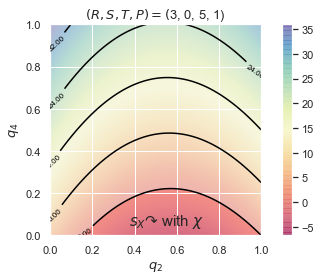

In [43]:
# region of Class A
target_A_plot(s_XA, payoff_con_subs, 'con', zoom = False, fs = 15) # conventional values: 2P < T + S

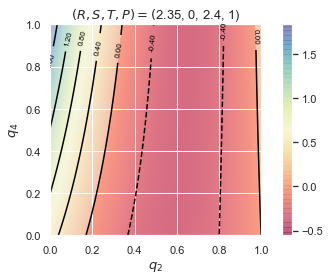

In [44]:
target_A_plot(s_XA, payoff_insane_subs, 'con_x', zoom = False, fs = 15) # 2P < T + S

In [45]:
# Donation Game: 2P < T + S
# b = 2, 4, 8, 16, c = 1
payoff_dg_subs_2 = [(R, 1), (S, -1), (T, 2), (P, 0)]
payoff_dg_subs_4 = [(R, 3), (S, -1), (T, 4), (P, 0)]
payoff_dg_subs_8 = [(R, 7), (S, -1), (T, 8), (P, 0)]
payoff_dg_subs_16 = [(R, 15), (S, -1), (T, 16), (P, 0)]

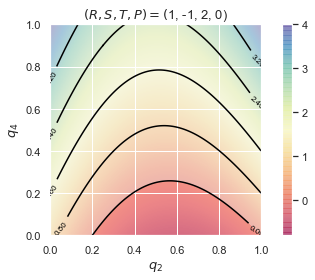

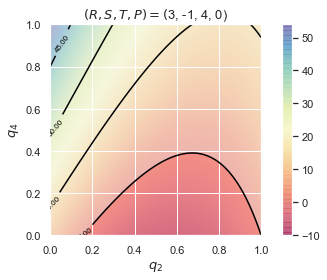

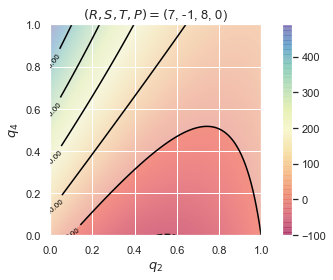

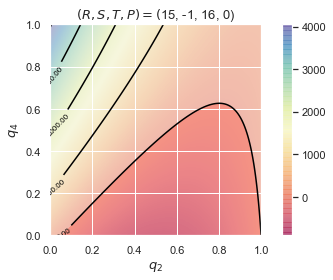

In [46]:
# Donation Game: 2P < T + S
target_A_plot(s_XA, payoff_dg_subs_2, 'dg_2')
target_A_plot(s_XA, payoff_dg_subs_4, 'dg_4')
target_A_plot(s_XA, payoff_dg_subs_8, 'dg_8')
target_A_plot(s_XA, payoff_dg_subs_16, 'dg_16')

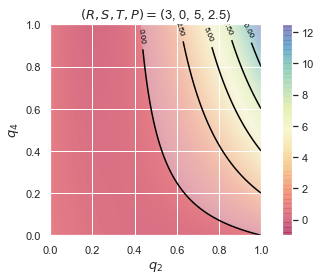

In [47]:
target_A_plot(s_XA, payoff_eqn_subs, 'eqn') # 2P = T + S

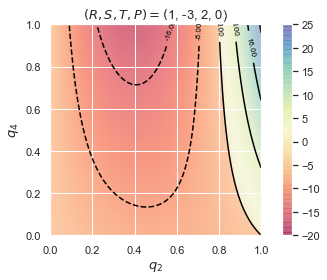

In [48]:
target_A_plot(s_XA, payoff_abn_subs, 'abn') # 2P > T + S

In [49]:
q_subs_A_con = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)]
q_subs_A_eqn = [(q_1, 1), (q_2, 0.4), (q_3, 0), (q_4, 0.6)]
q_subs_A_abn_1 = [(q_1, 1), (q_2, 0.1), (q_3, 0), (q_4, 0.8)]
q_subs_A_abn_2 = [(q_1, 1), (q_2, 0.6), (q_3, 0), (q_4, 0.6)]

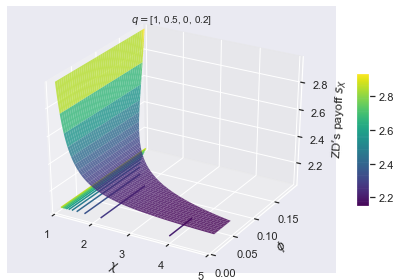

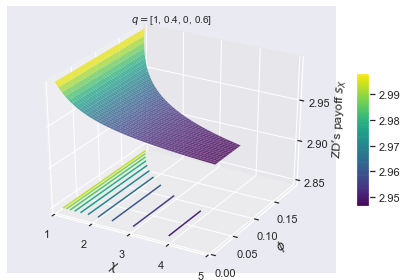

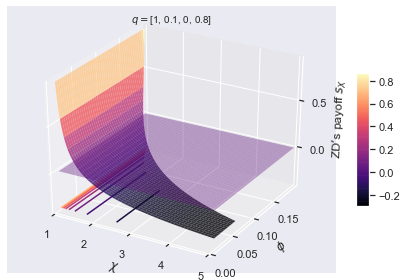

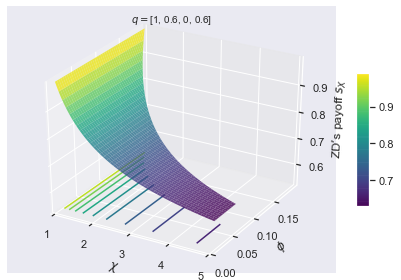

In [50]:
# the payoff of X
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_A_con, 'viridis', 'A_con') # conventional values: 2P < T + S
s_X_3D(s_X, payoff_eqn_subs, phi_upper_con, q_subs_A_eqn, 'viridis', 'A_eqn') # 2P = T + S
s_X_3D(s_X, payoff_abn_subs, phi_upper_abn, q_subs_A_abn_1, 'magma', 'A_abn_1') # 2P > T + S, s_X < s_Y possible
s_X_3D(s_X, payoff_abn_subs, phi_upper_abn, q_subs_A_abn_2, 'viridis', 'A_abn_2') # 2P > T + S

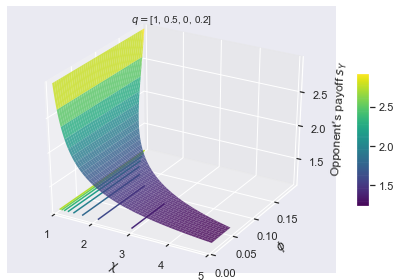

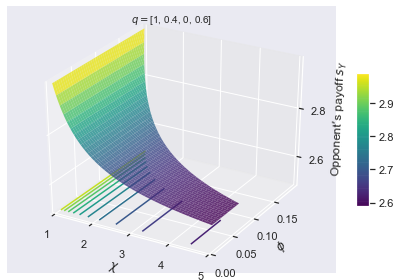

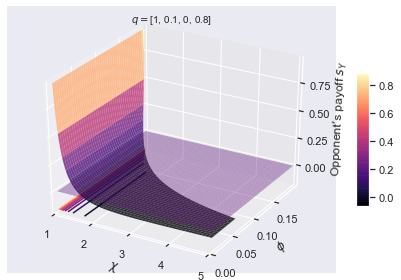

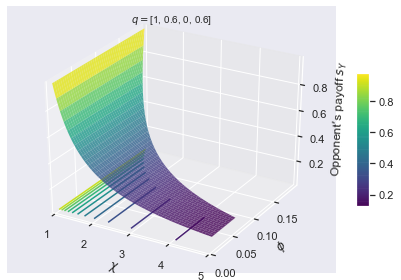

In [51]:
# the payoff of Y
s_Y_3D(s_Y, payoff_con_subs, phi_upper_con, q_subs_A_con, 'viridis', 'A_con') # conventional values: 2P < T + S
s_Y_3D(s_Y, payoff_eqn_subs, phi_upper_con, q_subs_A_eqn, 'viridis', 'A_eqn') # 2P = T + S
s_Y_3D(s_Y, payoff_abn_subs, phi_upper_abn, q_subs_A_abn_1, 'magma', 'A_abn_1') # 2P > T + S, s_X < s_Y possible
s_Y_3D(s_Y, payoff_abn_subs, phi_upper_abn, q_subs_A_abn_2, 'viridis', 'A_abn_2') # 2P > T + S

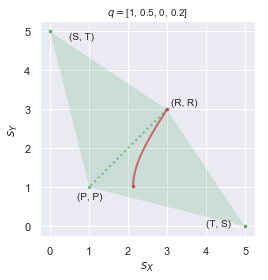

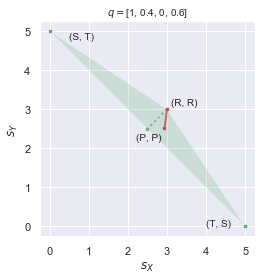

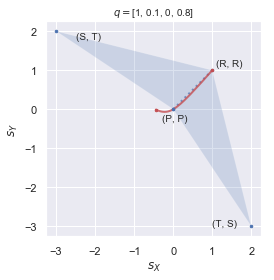

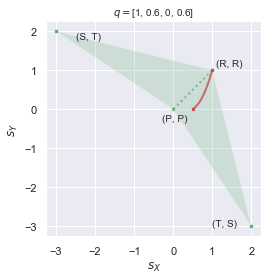

In [52]:
# the payoffs of X and Y
payoff_quad_x(s_XA, s_YA, payoff_con_subs, q_subs_A_con, 'A_con', chi_1 = 1, zoom = False, ms = 5, fs = 10) # conventional values: 2P < T + S
payoff_quad_x(s_XA, s_YA, payoff_eqn_subs, q_subs_A_eqn, 'A_eqn') # 2P = T + S
payoff_quad_x(s_XA, s_YA, payoff_abn_subs, q_subs_A_abn_1, 'A_abn_1', chi_1 = 4.8/2.8) # 2P > T + S, s_X < s_Y possible
payoff_quad_x(s_XA, s_YA, payoff_abn_subs, q_subs_A_abn_2, 'A_abn_2') # 2P > T + S


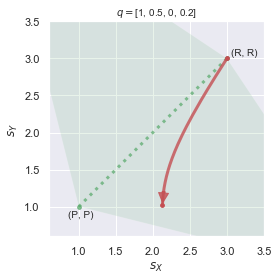

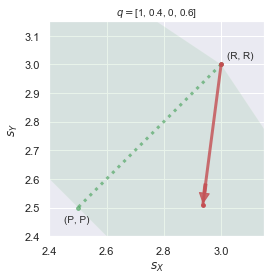

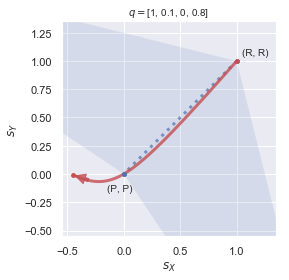

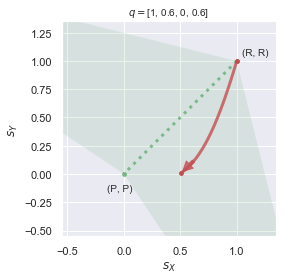

In [53]:
# the payoffs of X and Y
# zoom in
payoff_quad_x(s_XA, s_YA, payoff_con_subs, q_subs_A_con, 'A_con', zoom = True) # conventional values: 2P < T + S
payoff_quad_x(s_XA, s_YA, payoff_eqn_subs, q_subs_A_eqn, 'A_eqn', zoom = True) # 2P = T + S
payoff_quad_x(s_XA, s_YA, payoff_abn_subs, q_subs_A_abn_1, 'A_abn_1', chi_1 = 4.8/2.8, zoom = True) # 2P > T + S, s_X < s_Y possible
payoff_quad_x(s_XA, s_YA, payoff_abn_subs, q_subs_A_abn_2, 'A_abn_2', zoom = True) # 2P > T + S


## Class B: 
### $q_2 = q_3 = 0$

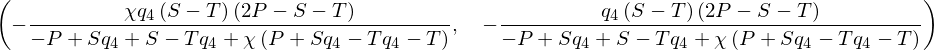

In [54]:
s_XB = cancel(s_X.subs([(q_2, 0), (q_3, 0)]))
s_YB = cancel(s_Y.subs([(q_2, 0), (q_3, 0)]))
s_XB = collect(s_XB, chi)
collect(factor(s_XB - P), chi), collect(factor(s_YB - P), chi)

In [55]:
num, deno = fraction(factor(diff(s_XB, chi)))
target_B = factor(num/(q_4*(T - S)))
target_B # not in the set when 2P <= T + S, in the set when 2P > T + S

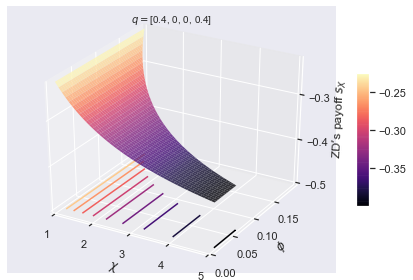

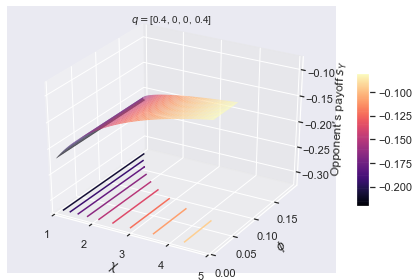

In [56]:
q_subs_B_abn_1 = [(q_1, 0.2), (q_2, 0), (q_3, 0), (q_4, 0.2)]
q_subs_B_abn_2 = [(q_1, 0.4), (q_2, 0), (q_3, 0), (q_4, 0.4)]
q_subs_B_abn_3 = [(q_1, 0.6), (q_2, 0), (q_3, 0), (q_4, 0.6)]
q_subs_B_abn_4 = [(q_1, 0.8), (q_2, 0), (q_3, 0), (q_4, 0.8)]
# the payoff of X
s_X_3D(s_X, payoff_abn_subs, phi_upper_abn, q_subs_B_abn_2, 'magma', 'B_abn_2') # 2P > T + S, s_X < s_Y
# the payoff of Y
s_Y_3D(s_Y, payoff_abn_subs, phi_upper_abn, q_subs_B_abn_2, 'magma', 'B_abn_2') # 2P > T + S, s_X < s_Y

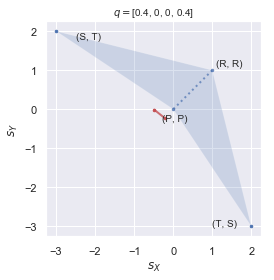

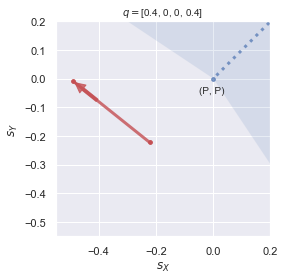

In [57]:
# the payoffs of X and Y
payoff_quad_x(s_XB, s_YB, payoff_abn_subs, q_subs_B_abn_2, 'B_abn_2') # 2P > T + S, s_X < s_Y
# zoom in
payoff_quad_x(s_XB, s_YB, payoff_abn_subs, q_subs_B_abn_2, 'B_abn_2', zoom = True) # 2P > T + S, s_X < s_Y

## Class C: 
### $q_1 = q_2 = q_3$

In [58]:
# q_1 = q_2 = q_3
s_XC = cancel(s_X.subs([(q_2, q_1), (q_3, q_1)]))
s_YC = cancel(s_Y.subs([(q_2, q_1), (q_3, q_1)]))
s_XC = collect(s_XC, chi)

In [59]:
f_C = collect(fraction(collect(factor(s_XC - P), chi))[1], chi)
d_C1 = collect(factor(f_C.coeff(chi, 1)), q_4)

In [60]:
num, deno = fraction(factor(diff(s_XC, chi)))
target_C = factor(num/((T - S)*q_4))

In [61]:
a_C0, d_C0 = factor_list(target_C)[1][0][0], factor_list(target_C)[0]*factor_list(target_C)[1][1][0]
a_C0, d_C0  = collect(a_C0, q_1), collect(d_C0, q_4)
d_01 = factor(d_C0.coeff(q_4, 1))
d_00 = factor(d_C0.coeff(q_4, 0))
a_C0, d_01, d_00

In [62]:
factor((d_C1 + d_C0)/(T - S))

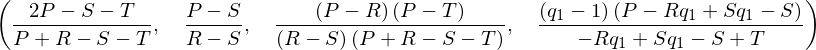

In [64]:
h_C = -d_00/d_01
q_c = solve(a_C0, q_1)[0] 
q_C = solve(d_C0.subs(q_4, 0), q_1)[1] 
q_c, q_C, factor(q_C - q_c), h_C

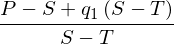

In [65]:
collect(factor(h_C.subs(R, T)), q_1)

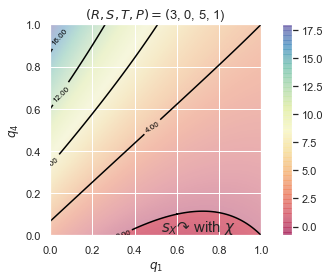

In [66]:
# region of Class C
target_C_plot(s_XC, payoff_con_subs, 'con', zoom = False, fs = 15) # conventional values: 2P < T + S

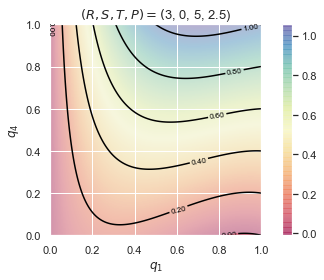

In [67]:
target_C_plot(s_XC, payoff_eqn_subs, 'eqn') # 2P = T + S

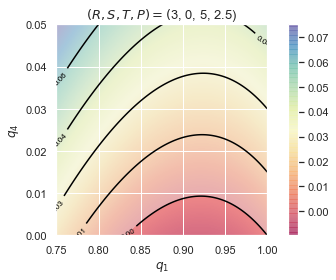

In [68]:
target_C_plot(s_XC, payoff_eqn_subs, 'eqn', zoom = True) # 2P = T + S, zoom in

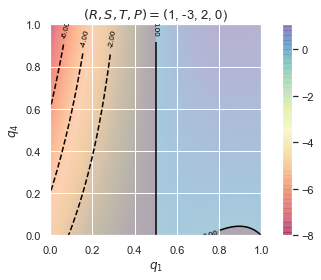

In [69]:
target_C_plot(s_XC, payoff_abn_subs, 'abn') # 2P > T + S

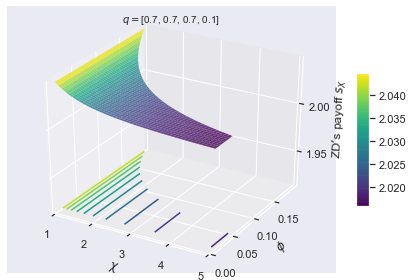

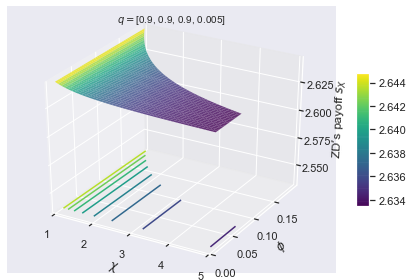

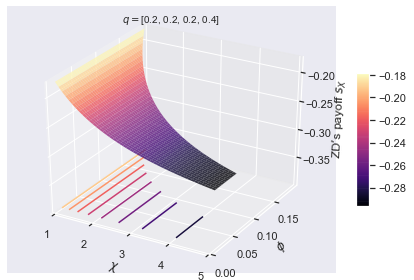

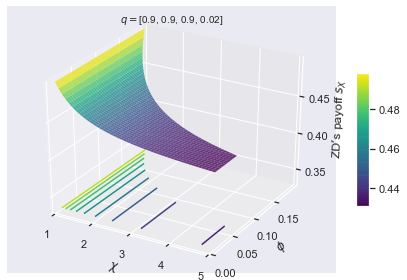

In [70]:
q_subs_C_con = [(q_1, 0.7), (q_2, 0.7), (q_3, 0.7), (q_4, 0.1)]
q_subs_C_eqn = [(q_1, 0.9), (q_2, 0.9), (q_3, 0.9), (q_4, 0.005)]
q_subs_C_abn_1 = [(q_1, 0.2), (q_2, 0.2), (q_3, 0.2), (q_4, 0.4)]
q_subs_C_abn_2 = [(q_1, 0.9), (q_2, 0.9), (q_3, 0.9), (q_4, 0.02)]
# the payoff of X
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_C_con, 'viridis', 'C_con') # conventional values: 2P < T + S
s_X_3D(s_X, payoff_eqn_subs, phi_upper_con, q_subs_C_eqn, 'viridis', 'C_eqn') # 2P = T + S
s_X_3D(s_X, payoff_abn_subs, phi_upper_abn, q_subs_C_abn_1, 'magma', 'C_abn_1') # 2P > T + S, s_X < s_Y
s_X_3D(s_X, payoff_abn_subs, phi_upper_abn, q_subs_C_abn_2, 'viridis', 'C_abn_2') # 2P > T + S

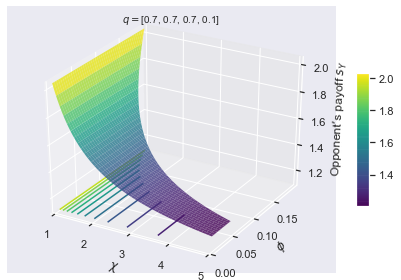

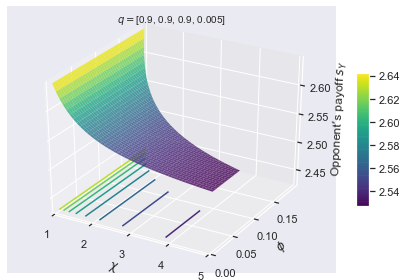

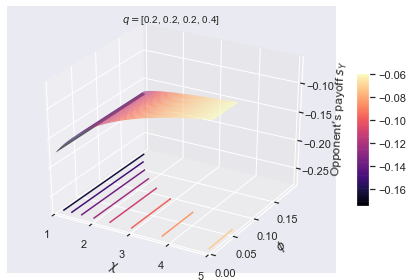

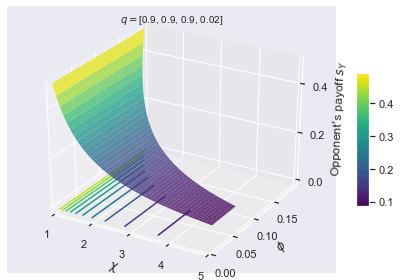

In [251]:
# the payoff of Y
s_Y_3D(s_Y, payoff_con_subs, phi_upper_con, q_subs_C_con, 'viridis', 'C_con') # conventional values: 2P < T + S
s_Y_3D(s_Y, payoff_eqn_subs, phi_upper_con, q_subs_C_eqn, 'viridis', 'C_eqn') # 2P = T + S
s_Y_3D(s_Y, payoff_abn_subs, phi_upper_abn, q_subs_C_abn_1, 'magma', 'C_abn_1') # 2P > T + S, s_X < s_Y
s_Y_3D(s_Y, payoff_abn_subs, phi_upper_abn, q_subs_C_abn_2, 'viridis', 'C_abn_2') # 2P > T + S

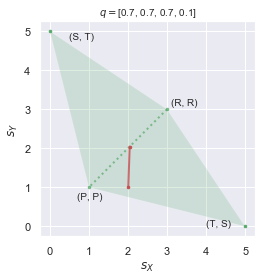

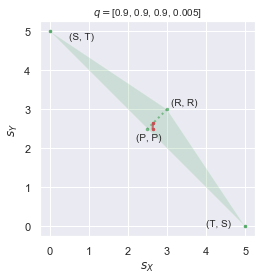

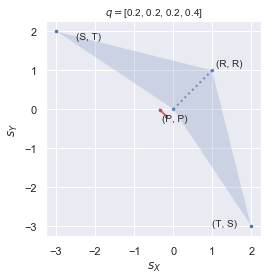

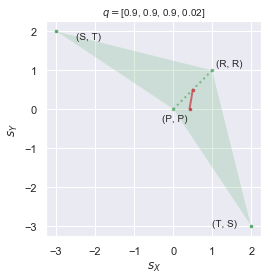

In [71]:
# the payoffs of X and Y
payoff_quad_x(s_XC, s_YC, payoff_con_subs, q_subs_C_con, 'C_con') # conventional values: 2P < T + S
payoff_quad_x(s_XC, s_YC, payoff_eqn_subs, q_subs_C_eqn, 'C_eqn') # 2P = T + S
payoff_quad_x(s_XC, s_YC, payoff_abn_subs, q_subs_C_abn_1, 'C_abn_1') # 2P > T + S, s_X < s_Y
payoff_quad_x(s_XC, s_YC, payoff_abn_subs, q_subs_C_abn_2, 'C_abn_2') # 2P > T + S

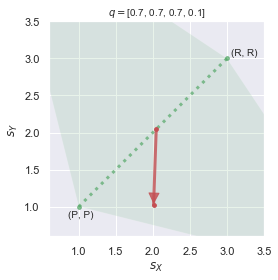

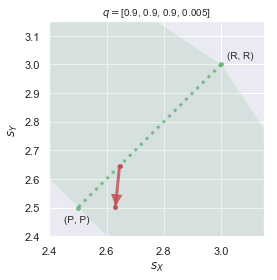

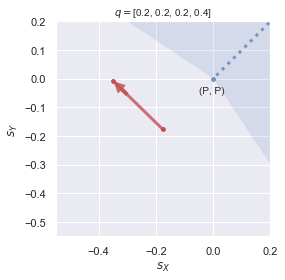

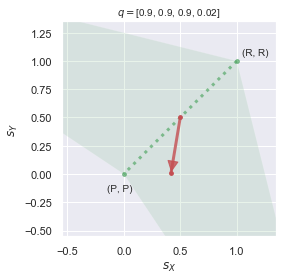

In [72]:
# zoom in
payoff_quad_x(s_XC, s_YC, payoff_con_subs, q_subs_C_con, 'C_con', zoom = True) # conventional values: 2P < T + S
payoff_quad_x(s_XC, s_YC, payoff_eqn_subs, q_subs_C_eqn, 'C_eqn', zoom = True) # 2P = T + S
payoff_quad_x(s_XC, s_YC, payoff_abn_subs, q_subs_C_abn_1, 'C_abn_1', zoom = True) # 2P > T + S, s_X < s_Y
payoff_quad_x(s_XC, s_YC, payoff_abn_subs, q_subs_C_abn_2, 'C_abn_2', zoom = True) # 2P > T + S

## Class D: 
### $q_4 = h_D$

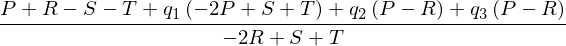

In [74]:
h_D = collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1)
h_D

In [75]:
s_XD = cancel(s_X.subs(q_4, h_D))
s_YD = cancel(s_Y.subs(q_4, h_D))
s_XD = collect(s_XD, chi)
d_D1 = -fraction(collect(factor(s_XD - P), chi))[1].coeff(chi, 1)
d_D1 = collect(collect(collect(d_D1, q_3), q_2), q_1)

In [76]:
num, deno = fraction(factor(diff(s_XD, chi)))
target_D = factor(num/(T - S))
target_D

In [77]:
d_D0, a_D0 = factor_list(target_D)[1][0][0], factor_list(target_D)[0]*factor_list(target_D)[1][1][0]
d_D0 = collect(collect(collect(d_D0, q_3), q_2), q_1) # decreasing of q_1, increasing of q_2, increasing of q_3 # want negative
a_D0 = collect(collect(collect(a_D0, q_3), q_2), q_1) # -(T + S - 2P) function of q_1, increasing of q_2, increasing of q_3 # want positive
a_D0, d_D0

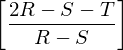

In [78]:
solve(d_D0.subs([(q_1, 1), (q_3, 1)]), q_2)

In [79]:
factor((R - P)*d_D1 - (T - R)*a_D0)

In [80]:
factor((R - P)*(d_D1 + d_D0) - (T - S)*a_D0)

In [81]:
collect(factor(((R - S)*(2*R - T - S - a_D0) + (R - P)*d_D0)/(2*R - T - S)), q_3)

In [82]:
factor(Matrix([-(T + S - 2*P), R - P, R - P]).cross(Matrix([-(T - S), R - S, T - R]))[0])

In [83]:
# find the line of intersection
n_d = [d_D0.coeff(q_1, 1), d_D0.coeff(q_2, 1), d_D0.coeff(q_3, 1)]
n_a = [a_D0.coeff(q_1, 1), a_D0.coeff(q_2, 1), a_D0.coeff(q_3, 1)]
factor(np.cross(n_a, n_d)[0]), factor(np.cross(n_a, n_d)[1]), factor(np.cross(n_a, n_d)[2])

In [84]:
collect(collect(factor((2*R - T - S - a_D0)*(R - S) + d_D0*(R - P)), q_3), q_1)

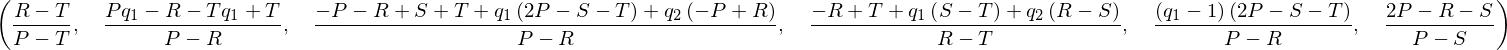

In [85]:
L = solve(factor((R - P)*d_D0 - (T - R)*a_D0), q_2)[0]
q_d = solve(L, q_1)[0]
k = collect(collect(solve(a_D0, q_3)[0], q_2), q_1)
K = collect(collect(solve(d_D0, q_3)[0], q_2), q_1)
l = factor(solve(a_D0.subs(q_3, 1), q_2)[0])
q_D = solve(L - l, q_1)[0]
q_d, L, k, K, l, q_D

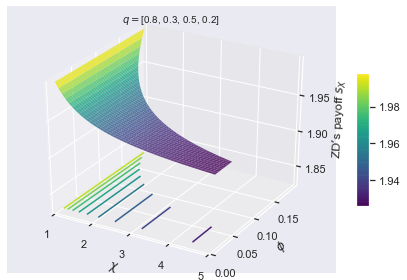

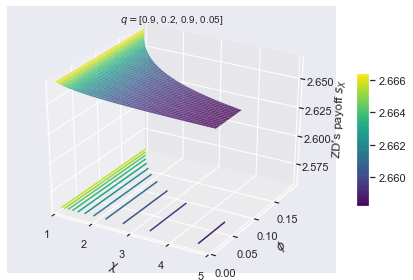

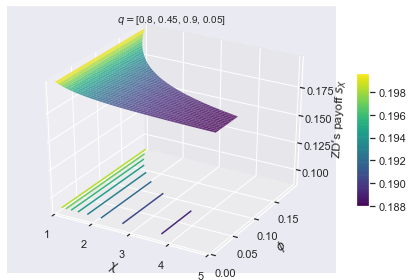

In [95]:
q_subs_D_con = [(q_1, 0.8), (q_2, 0.3), (q_3, 0.5), (q_4, 0.2)]
q_subs_D_eqn = [(q_1, 0.9), (q_2, 0.2), (q_3, 0.9), (q_4, 0.05)]
q_subs_D_abn = [(q_1, 0.8), (q_2, 0.45), (q_3, 0.9), (q_4, 0.05)]
# the payoff of X
s_X_3D(s_X, payoff_con_subs, phi_upper_con, q_subs_D_con, 'viridis', 'D_con') # conventional values: 2P < T + S
s_X_3D(s_X, payoff_eqn_subs, phi_upper_con, q_subs_D_eqn, 'viridis', 'D_eqn') # 2P = T + S
s_X_3D(s_X, payoff_abn_subs, phi_upper_abn, q_subs_D_abn, 'viridis', 'D_abn') # 2P > T + S

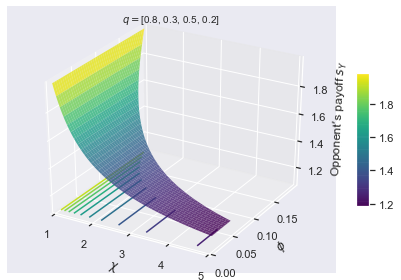

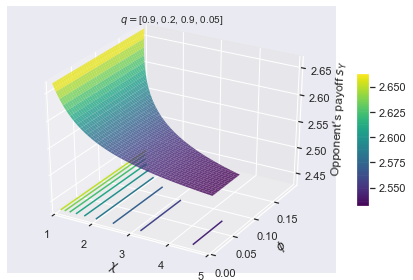

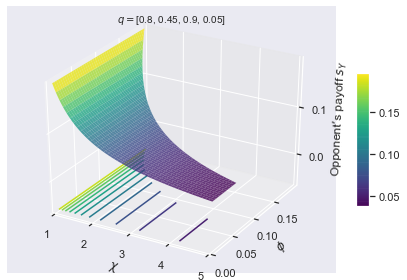

In [96]:
# the payoff of Y
s_Y_3D(s_Y, payoff_con_subs, phi_upper_con, q_subs_D_con, 'viridis', 'D_con') # conventional values: 2P < T + S
s_Y_3D(s_Y, payoff_eqn_subs, phi_upper_con, q_subs_D_eqn, 'viridis', 'D_eqn') # 2P + T + S
s_Y_3D(s_Y, payoff_abn_subs, phi_upper_abn, q_subs_D_abn, 'viridis', 'D_abn') # 2P > T + S

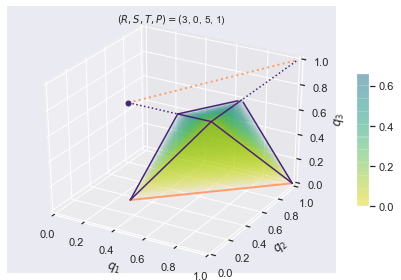

In [97]:
# region of Class D
target_D_plot(s_XD, h_D, payoff_con_subs, 'con') # conventional values: 2P < T + S

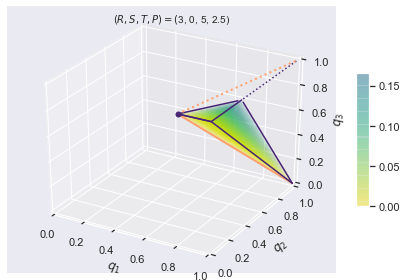

In [98]:
target_D_plot(s_XD, h_D, payoff_eqn_subs, 'eqn') # 2P = T + S

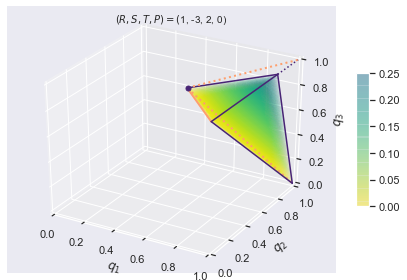

In [99]:
target_D_plot(s_XD, h_D, payoff_abn_subs, 'abn') # 2P > T + S

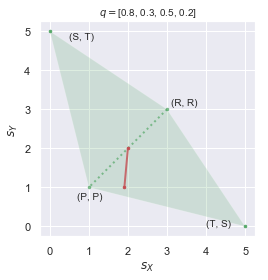

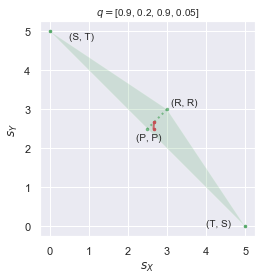

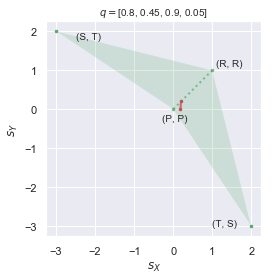

In [100]:
# the payoffs of X and Y
payoff_quad_x(s_XD, s_YD, payoff_con_subs, q_subs_D_con, 'D_con') # conventional values: 2P < T + S
payoff_quad_x(s_XD, s_YD, payoff_eqn_subs, q_subs_D_eqn, 'D_eqn') # 2P = T + S
payoff_quad_x(s_XD, s_YD, payoff_abn_subs, q_subs_D_abn, 'D_abn') # 2P > T + S

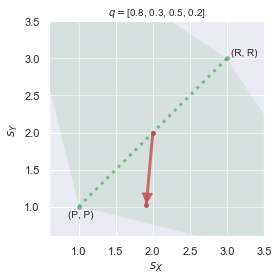

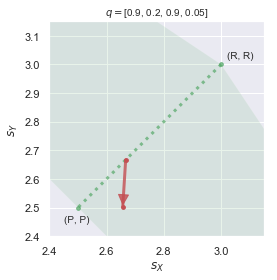

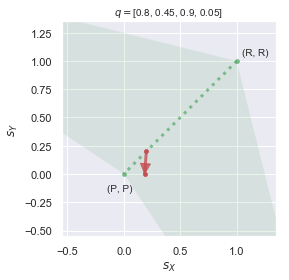

In [101]:
# zoom in
payoff_quad_x(s_XD, s_YD, payoff_con_subs, q_subs_D_con, 'D_con', zoom = True) # conventional values: 2P < T + S
payoff_quad_x(s_XD, s_YD, payoff_eqn_subs, q_subs_D_eqn, 'D_eqn', zoom = True) # 2P = T + S
payoff_quad_x(s_XD, s_YD, payoff_abn_subs, q_subs_D_abn, 'D_abn', zoom = True) # 2P > T + S

## Maximum of $s_X$.

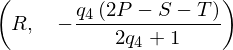

In [86]:
factor(s_XA.subs(chi, 1)), collect(factor(s_XB.subs(chi, 1) - P), q_4)

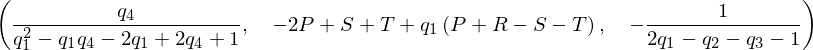

In [87]:
cancel(factor(s_XC.subs(chi, 1) - P)/a_C0), a_C0, cancel(factor(s_XD.subs(chi, 1) - P)/a_D0)

In [88]:
factor(a_D0.subs(q_1, 1)/(R - P)), factor(d_D0.subs(q_1, 1))
# 1 - q_2 < q_3 < (R - S)/(T - R) (1 - q_2)

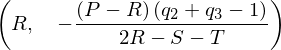

In [89]:
factor(s_XD.subs(chi, 1).subs(q_1, 1)), factor(h_D.subs(q_1, 1))

In [90]:
epsilon, delta = symbols('epsilon, delta', real = True)

In [91]:
factor((s_XC.subs(chi, 1) - P).subs(q_4, 0))

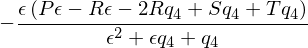

In [92]:
factor(R - (s_XC.subs(chi, 1)).subs(q_1, 1 - epsilon))

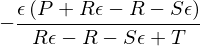

In [93]:
factor(h_C.subs(q_1, 1 - epsilon))

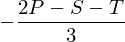

In [94]:
factor(s_XC.subs(chi, 1).subs(q_4, 1).subs(q_1, 0) - P)